In [356]:
from matplotlib import pyplot as plt
import math
import random

x=rx(1−x)

In [411]:
def args_generator(xgen, rgen):
    for x, r in zip(xgen, rgen):
        yield {'x':x, 'r':r}
        
def randgen(start, end, n = None):
    i = 0
    while n is None or n < N:
        yield random.uniform(start, end)
        i += 1        

def intervalgen(start, end, n):
    x = start
    step = (end - start) / n
    while x < end:
        yield x
        x += step
        
def constgen(c):
    while True:
        yield c

In [502]:
class Sequence:
    def __init__(self, fun):
        self.fun = fun
            
    def plot(self, n, args_generator, axis = None):
        for args in args_generator:
            vals = list(self(n, **args))
            if axis is None:
                xs = list(range(1,len(vals) + 1))
                size = (20, 10)
                title = 'from i to x_i'
            elif axis == 'iter':
                xs = vals[:-1]
                vals = vals[1:]
                size = (10, 10)
                title = 'from x_i to x_(i+1)'
            plt.plot(xs, vals, '.')
        
        annotation = [', '.join(f'{x} = {val}' for x,val in args.items()) for args in args_generator]
        plt.legend(annotation)
        plt.title(title)
        plt.gcf().set_size_inches(size)
        
    def bifurcation_diagram(self, args_generator, N, k):
        xs, vals = [], []
        for args in args_generator:
            gen = self(N + k, **args)
            r = args['r']
            i = 0
            xs += [r] * k
            vals += list(gen)[-k:]
        
        plt.plot(xs, vals, '.', ms = 0.2)
        plt.title('bifurcation_diagram')
        plt.gcf().set_size_inches((20,10))
    
    def __call__(self, n = None, **kwargs):
        def generator(x, **kwargs):
            i = 0
            while n is None or i < n:
                yield x
                x = self.fun(x, **kwargs)
                i+=1
                
        return generator(**kwargs)
    
seq = Sequence(lambda x, r: r * x * (1 - x))    

In [461]:
def convergance(sequence, args_generator, eps, expectations, N, total, expect_formula):
    args_interval = {}
    for args, expectation in zip(args_generator,expectations):
        for k,v in args.items():
            args_interval.setdefault(k, (1e9, 1e-9))
            minim, maxim = args_interval[k]
            args_interval[k] = (min(minim,args[k]), max(maxim,args[k]))
        
        colebations = False
        less = None
        nearest = expectation + 1e9

        gen = sequence(**args)
        n, tries = 0, 0
        
        for x in gen:
            if abs(x - expectation) < abs(nearest - expectation):
                nearest = x
            
            if abs(x - expectation) < eps:
                if less is None:
                    less = x < expectation
                elif not colebations:
                    if (x < expectation) ^ less:
                        colebations = True   
                n += 1
                if n == N:
                    break
            
            elif n != 0:
                n = 0
                
            tries += 1
            if tries == total:
                print(f'Not converges to expected value: {expectation}')
                print(f'After {total} operations the nearest value was {nearest} ({abs(nearest - expectation)})')
                print(f'Args that doesn\'t show convergance are:')
                print(args)
                return False
            
    colebstr = ' with colebations' if colebations else ''
    print(f'Sequence converges to {expect_formula}{colebstr} on given args:')
    print(', '.join(f'{k} from {m:.2} to {M:.2}' for k, (m, M) in args_interval.items()))
    print(f'Found N that for every n in [N..N+{N}] |x_n - {expect_formula}| < {eps}')
    return True

In [462]:
xgen = randgen(0.0001,0.9999)
from_0_to_1 = intervalgen(0.01,1, 1000)
convergance(seq, 
            args_generator(xgen, from_0_to_1),
            eps=1e-6, 
            expectations=constgen(0), 
            N=100, 
            total=10000,
            expect_formula=0)


Sequence converges to 0 on given args:
x from 0.00031 to 1.0, r from 0.01 to 1.0
Found N that for every n in [N..N+100] |x_n - 0| < 1e-06


True

In [463]:
# eps = 1e-3 из-за ошибки в точности вычислений с плавающей точкой
from_1_to_2 = intervalgen(1.01,2, 1000)
convergance(seq, 
            args_generator(xgen, from_1_to_2),
            eps=1e-3, 
            expectations=map(lambda x: 1 - 1 / x, from_1_to_2), 
            N = 100, 
            total=10000,
            expect_formula='(1-1/r)')

Sequence converges to (1-1/r) on given args:
x from 0.00042 to 1.0, r from 1.0 to 2.0
Found N that for every n in [N..N+100] |x_n - (1-1/r)| < 0.001


True

In [464]:
from_2_to_3 = intervalgen(2.01,3, 1000)

convergance(seq, 
            args_generator(xgen, from_2_to_3),
            eps=1e-3, 
            expectations=map(lambda x: 1 - 1 / x, from_2_to_3), 
            N = 100, 
            total=10000,
            expect_formula='(1-1/r)')

Sequence converges to (1-1/r) with colebations on given args:
x from 0.0017 to 1.0, r from 2.0 to 3.0
Found N that for every n in [N..N+100] |x_n - (1-1/r)| < 0.001


True

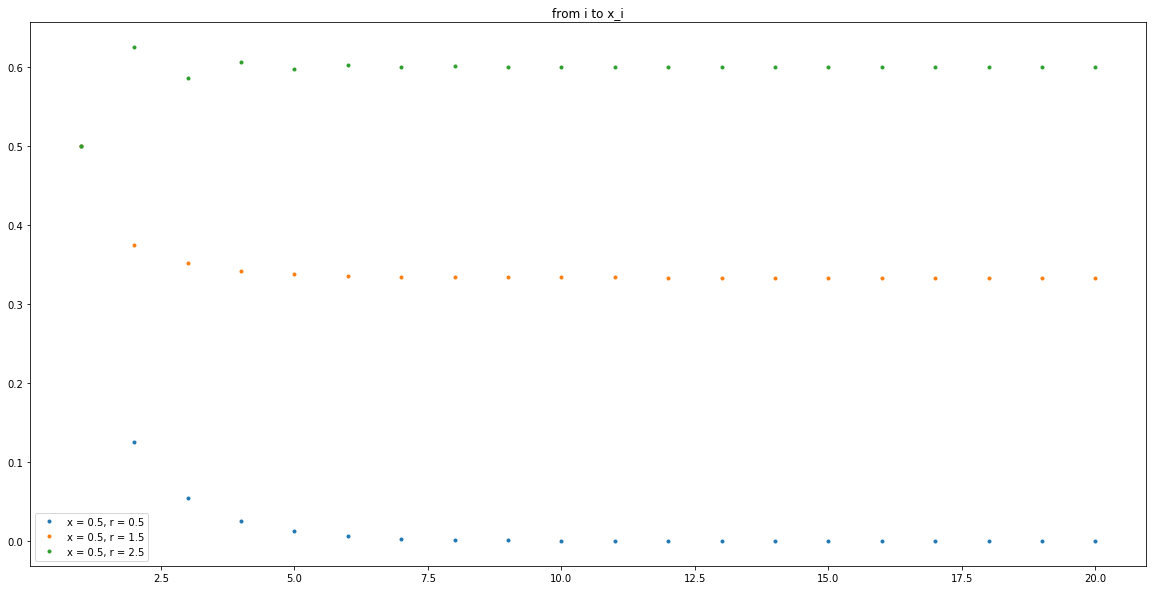

In [482]:
all_args = [ {'x':0.5, 'r':0.5}
           , {'x':0.5, 'r':1.5}
           , {'x':0.5, 'r':2.5}
           ]

seq.plot(20, args_generator = all_args)

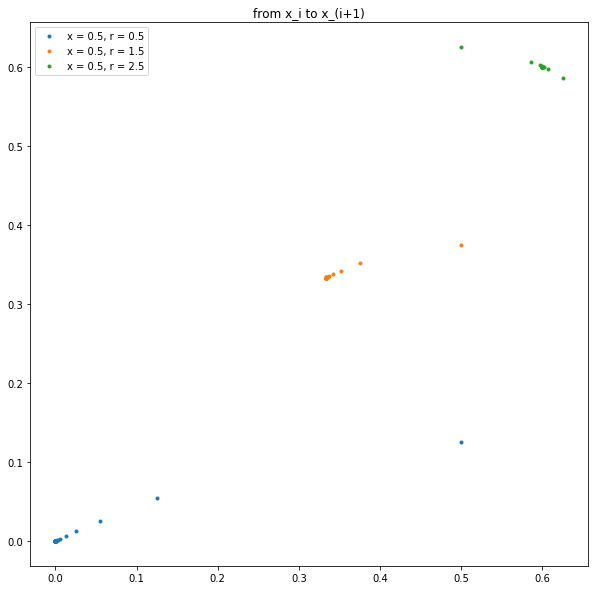

In [503]:
seq.plot(100, args_generator = all_args, axis = 'iter')

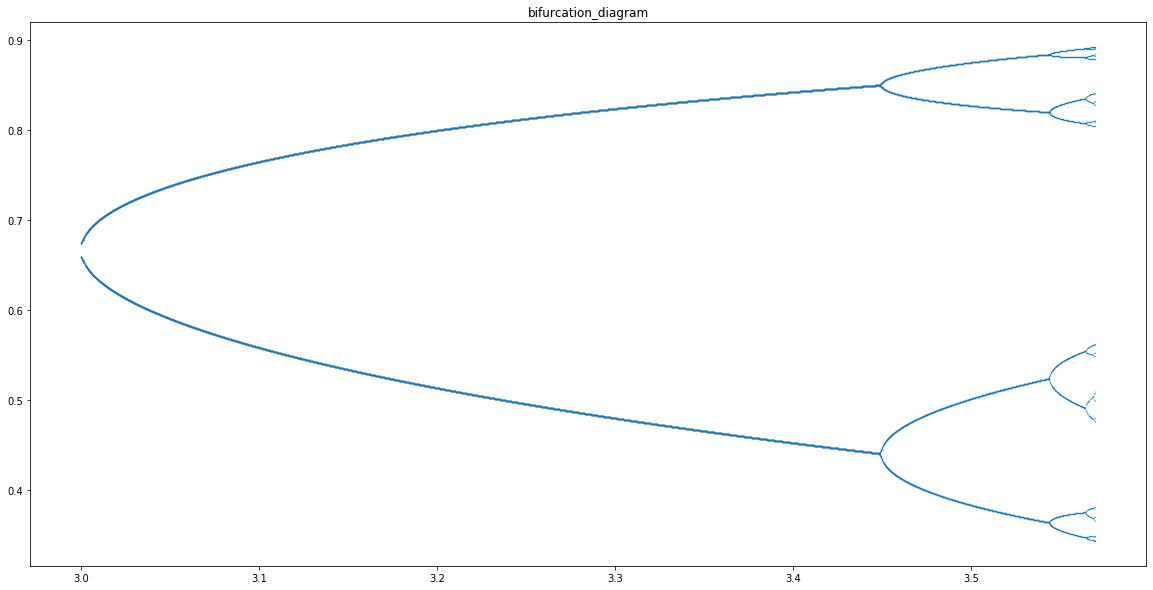

In [473]:
r_inf = 3.5699456 
from_3_to_r = intervalgen(3, r_inf, 10000)

seq.bifurcation_diagram(args_generator(xgen,from_3_to_r), N = 1000, k = 10)

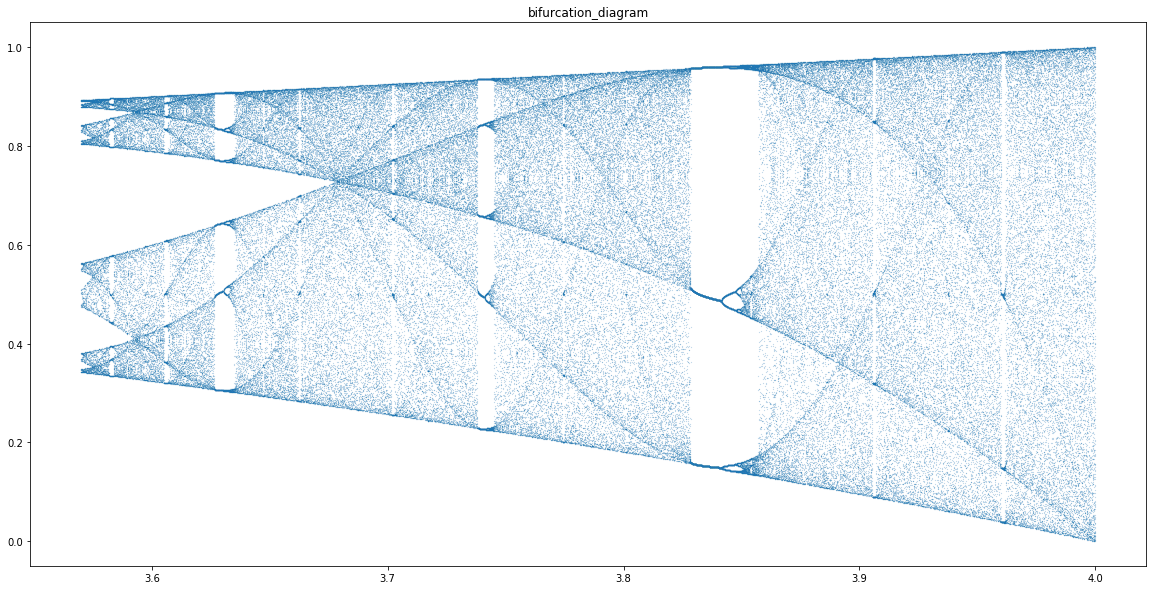

In [483]:
from_r_to_4 = intervalgen(r_inf, 4, 10000)

seq.bifurcation_diagram(args_generator(xgen,from_r_to_4), N = 1000, k = 20)